In [1]:
# Scikit-learn doesn't support missing data

# MCAR - Missing Data Completely at Random: no relationship between the missing data and any other values within the dataset.

# MAR - Missing at Random:  we mean that the missingness is to do with the person but can be predicted from other information about the person.
# There is a systematic relationship between the missing values and the OBSERVED data eg the propensity to provide weight: 
# more men than women. The data availability depends on other factors. 
# In this example the factor is gender. Data are missing at random, conditional on eg age, gender
# To fill out the missing values, incorporate the Gender factor (group by).
# For example, if blood pressure data are missing at random, conditional on age and sex, then the distributions of missing 
# and observed blood pressures will be similar among people of the same age and sex.

# MNAR - Missing Data not at Random: the missingness is specifically related to what is missing, e.g. a person does not attend a drug test because the person took drugs the night before
# relationship between the missing data and the UNOBSERVED data.

# Although it is known that performing MI under the assumption of MAR when the actual missingness mechanism is MNAR may produce 
# biased estimates [4], this issue is not widely appreciated in dealing with missing data in palliative care studies [3]. 
# Even if it is not possible to distinguish between MNAR and MAR patterns using observed data, 
# the robustness of the MAR assumption can be investigated through sensitivity analyses [4, 14]: if the results obtained under 
# MAR and specific MNAR assumptions are similar, one can conclude that the presence of unobserved factors does not affect 
# the conclusions.

# Concepts of MCAR, MAR and MNAR - https://www-users.york.ac.uk/~mb55/intro/typemiss4.htm

# We need to understand how the data is collected to decide how to engineer the features.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)

In [56]:
data = pd.read_csv('titanic.csv')

data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [57]:
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [10]:
# use mean to get the fraction of missing data

data.isnull().mean() * 100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

<AxesSubplot:>

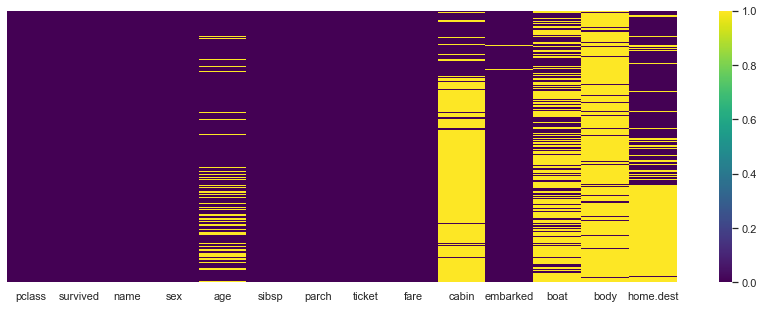

In [7]:
sns.set (rc = {'figure.figsize':(15, 5)})
sns.heatmap(data.isnull(), cmap='viridis', yticklabels=False)

# age and cabin values - Missing not at Random

In [ ]:
# values are missing as most people didn't survived

In [17]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [18]:
data['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

In [20]:
data['survived'].value_counts(normalize=True) * 100

0    61.802903
1    38.197097
Name: survived, dtype: float64

In [25]:
data['age'].isnull().mean() * 100

20.091673032849503

In [59]:
data['cabin'].isnull().groupby(data['survived']).mean() * 100

survived
0    87.391842
1    61.400000
Name: cabin, dtype: float64

In [58]:
data['age'].isnull().groupby(data['survived']).mean() * 100

survived
0    23.485785
1    14.600000
Name: age, dtype: float64

<AxesSubplot:>

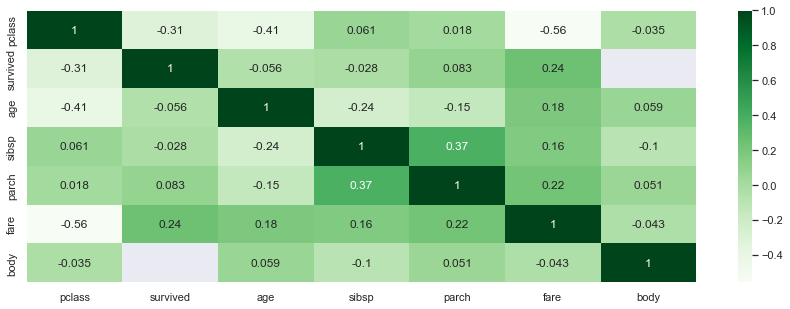

In [31]:
sns.heatmap(data.corr(), cmap='Greens', annot=True)

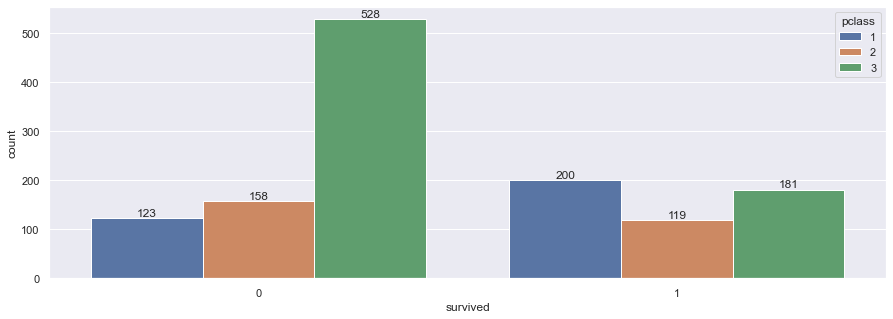

In [37]:
ax = sns.countplot(data=data, x='survived', hue='pclass')

for c in ax.containers:
    ax.bar_label(c)

# Missing Data Completely at Random

In [42]:
data[data['embarked'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


# Missing Data at Random (MAR)

In [43]:
data = pd.read_csv("loans.txt", usecols=['employment', 'time_employed'])

data.head()

,employment,time_employed
0,Teacher,<=5 years
1,Accountant,<=5 years
2,Statistician,<=5 years
3,Other,<=5 years
4,Bus driver,>5 years


In [45]:
data.isnull().mean() * 100

# both variables have roughly the same % of missing data

employment       6.11
time_employed    5.29
dtype: float64

In [54]:
# customers who declared employment

emp = data[~data['employment'].isnull()]

# customers who declared employment, but didn't declare time in employment

emp['time_employed'].isnull().mean() * 100

0.053253807647246784

In [53]:
# customers who didn't declare employment

unemp = data[data['employment'].isnull()]

# customers who didn't declare employment and time in employment

unemp['time_employed'].isnull().mean() * 100

85.76104746317512

In [ ]:
# So the missing values in the employment are related to the missing values in the time_employed